In [4]:
# Importing Libraries:
import pandas as pd
import numpy as np
import pickle
from sklearn import metrics 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
pd.pandas.set_option('display.max_columns', None)
# Reading Dataset:
dataset = pd.read_csv("kidney_disease.csv")
# Dropping unneccsary feature :
dataset = dataset.drop('id', axis=1)
# Replacing Categorical Values with Numericals
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]
# Coverting Objective into Numericals:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')
# Handling Missing Values:

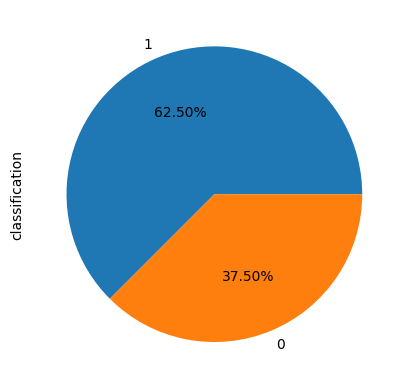

In [6]:
dataset['classification'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("")
plt.show()

In [7]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu','sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
'appet', 'pe', 'ane']
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())
# Dropping feature (Multicollinearity):

# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
# After feature importance:


X.to_csv('preprocessing.csv')
y.to_csv('ppprocessing.csv')

In [8]:
data=pd.read_csv("preprocessing.csv")

In [9]:
data.head()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
data.shape

(400, 25)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)
X_train.shape ,y_train.shape, X_test.shape

((280, 24), (280,), (120, 24))

In [12]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X_train_resampled,y_train_resampled=ros.fit_resample(X_train,y_train)
X_train_resampled.shape,y_train_resampled.shape

((376, 24), (376,))

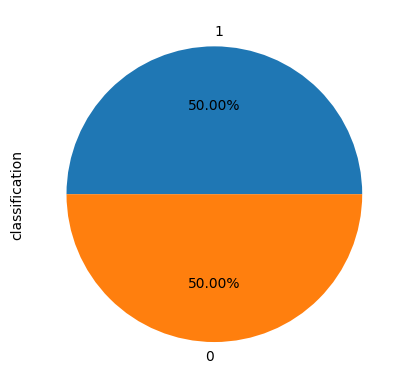

In [13]:
y_train_resampled.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("")
plt.show()

**Models**
Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(X_train_resampled,y_train_resampled)
y_train_tree = dt.predict(X_train_resampled)
y_test_tree = dt.predict(X_test)


In [15]:
from sklearn.metrics import confusion_matrix
acc_train_tree = metrics.accuracy_score(y_train_resampled,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train_resampled,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train_resampled,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train_resampled,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_tree).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))


Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.950

Decision Tree : f1_score on training Data: 1.000
Decision Tree : f1_score on test Data: 0.952

Decision Tree : Recall on training Data: 1.000
Decision Tree : Recall on test Data: 0.968

Decision Tree : precision on training Data: 1.000
Decision Tree : precision on test Data: 0.938

Specificity :   0.931


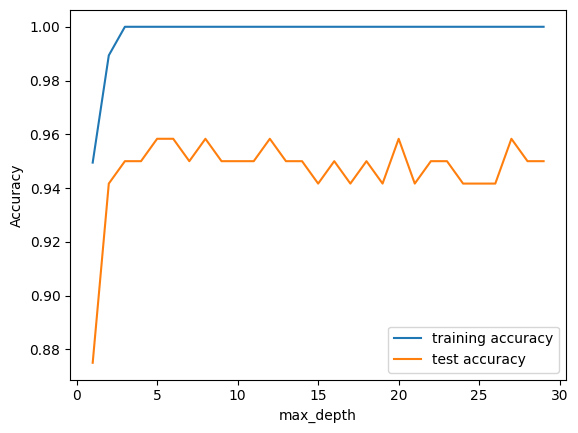

In [16]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## KNN Algorithm

In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn=KNeighborsClassifier()
knn.fit(X_train_resampled,y_train_resampled)

y_train_knn = knn.predict(X_train_resampled)
y_test_knn = knn.predict(X_test)

In [18]:
acc_train_knn = metrics.accuracy_score(y_train_resampled,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("KNN : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train_resampled,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("KNN : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("KNN : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train_resampled,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("KNN : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("KNN: Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train_resampled,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("KNN : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("KNN : precision on test Data: {:.3f}".format(precision_score_test_knn))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_knn).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

KNN : Accuracy on training Data: 0.838
KNN : Accuracy on test Data: 0.692

KNN : f1_score on training Data: 0.809
KNN : f1_score on test Data: 0.634

KNN : Recall on training Data: 0.686
KNN: Recall on test Data: 0.516

KNN : precision on training Data: 0.985
KNN : precision on test Data: 0.821

Specificity :   0.879


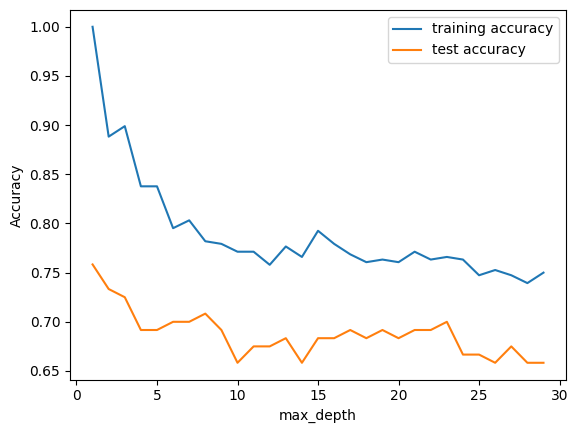

In [19]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = KNeighborsClassifier(n_neighbors=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Cat Boost

In [20]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cat=CatBoostClassifier()
cat.fit(X_train_resampled,y_train_resampled)

y_train_cat = cat.predict(X_train_resampled)
y_test_cat = cat.predict(X_test)

Learning rate set to 0.006785
0:	learn: 0.6798914	total: 149ms	remaining: 2m 28s
1:	learn: 0.6709304	total: 151ms	remaining: 1m 15s
2:	learn: 0.6583159	total: 152ms	remaining: 50.6s
3:	learn: 0.6472267	total: 154ms	remaining: 38.4s
4:	learn: 0.6359297	total: 156ms	remaining: 31s
5:	learn: 0.6271355	total: 158ms	remaining: 26.1s
6:	learn: 0.6145466	total: 159ms	remaining: 22.6s
7:	learn: 0.6035058	total: 161ms	remaining: 19.9s
8:	learn: 0.5926133	total: 163ms	remaining: 17.9s
9:	learn: 0.5801589	total: 164ms	remaining: 16.3s
10:	learn: 0.5695421	total: 166ms	remaining: 14.9s
11:	learn: 0.5595746	total: 168ms	remaining: 13.8s
12:	learn: 0.5504317	total: 169ms	remaining: 12.8s
13:	learn: 0.5385408	total: 170ms	remaining: 12s
14:	learn: 0.5288194	total: 174ms	remaining: 11.4s
15:	learn: 0.5199374	total: 175ms	remaining: 10.8s
16:	learn: 0.5101139	total: 177ms	remaining: 10.2s
17:	learn: 0.5004966	total: 179ms	remaining: 9.74s
18:	learn: 0.4930187	total: 180ms	remaining: 9.3s
19:	learn: 0.4

In [21]:
acc_train_cat = metrics.accuracy_score(y_train_resampled,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CATBOOST : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CATBOOST : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train_resampled,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CATBOOST : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CATBOOST : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train_resampled,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CATBOOST : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CATBOOST: Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train_resampled,y_train_cat)
precision_score_test_cat= metrics.precision_score(y_test,y_test_cat)
print("CATBOOST : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CATBOOST : precision on test Data: {:.3f}".format(precision_score_test_cat))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_cat).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

CATBOOST : Accuracy on training Data: 1.000
CATBOOST : Accuracy on test Data: 0.950

CATBOOST : f1_score on training Data: 1.000
CATBOOST : f1_score on test Data: 0.952

CATBOOST : Recall on training Data: 1.000
CATBOOST: Recall on test Data: 0.968

CATBOOST : precision on training Data: 1.000
CATBOOST : precision on test Data: 0.938

Specificity :   0.931


Learning rate set to 0.5
0:	learn: 0.1697463	total: 1.91ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 2.09ms	remaining: 2.09ms
1:	learn: 0.0670734	total: 3.49ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 2.16ms	remaining: 4.32ms
1:	learn: 0.0670734	total: 3.52ms	remaining: 1.76ms
2:	learn: 0.0363913	total: 4.88ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 1.89ms	remaining: 5.66ms
1:	learn: 0.0670734	total: 3.31ms	remaining: 3.31ms
2:	learn: 0.0363913	total: 4.61ms	remaining: 1.54ms
3:	learn: 0.0270054	total: 5.83ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 1.83ms	remaining: 7.33ms
1:	learn: 0.0670734	total: 3.24ms	remaining: 4.86ms
2:	learn: 0.0363913	total: 4.62ms	remaining: 3.08ms
3:	learn: 0.0270054	total: 6.65ms	remaining: 1.66ms
4:	learn: 0.0164902	total: 8.11ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 2.17ms	remaining: 10.8ms
1:	learn: 0.0670734	total: 4.23ms

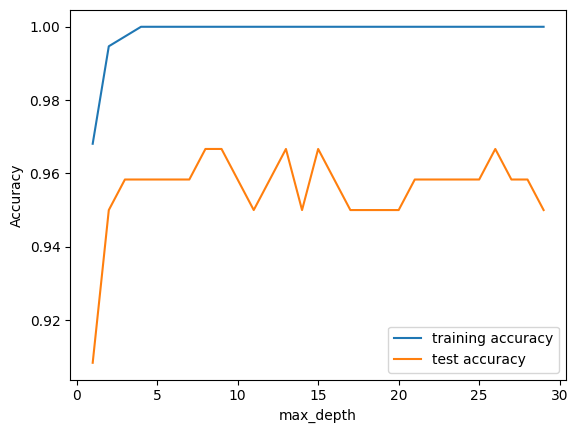

In [22]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = CatBoostClassifier(n_estimators=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Xg Boost

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb=XGBClassifier()
xgb.fit(X_train_resampled,y_train_resampled)
y_train_xgb = xgb.predict(X_train_resampled)
y_test_xgb = xgb.predict(X_test)

In [24]:
acc_train_xgb = metrics.accuracy_score(y_train_resampled,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBOOST : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBOOST : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train_resampled,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBOOST : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBOOST : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train_resampled,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBOOST : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBOOST: Recall on test Data: {:.3f}".format(recall_score_test_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train_resampled,y_train_xgb)
precision_score_test_xgb= metrics.precision_score(y_test,y_test_xgb)
print("XGBOOST : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBOOST : precision on test Data: {:.3f}".format(precision_score_test_xgb))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_xgb).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

XGBOOST : Accuracy on training Data: 1.000
XGBOOST : Accuracy on test Data: 0.950

XGBOOST : f1_score on training Data: 1.000
XGBOOST : f1_score on test Data: 0.952

XGBOOST : Recall on training Data: 1.000
XGBOOST: Recall on test Data: 0.968

XGBOOST : precision on training Data: 1.000
XGBOOST : precision on test Data: 0.938

Specificity :   0.931


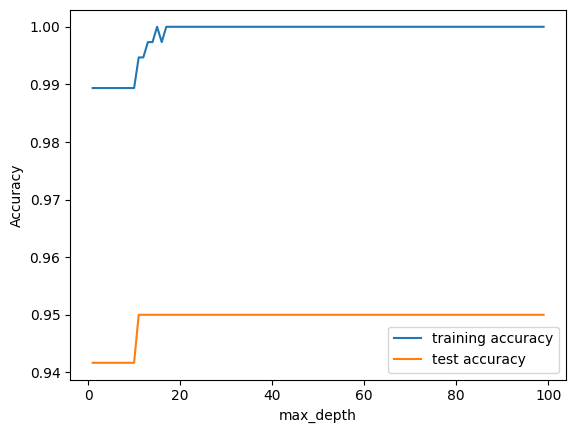

In [25]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,100)
for n in depth:
    tree_test = XGBClassifier(n_estimators=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_xgb))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Extra tree

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Extra=ExtraTreesClassifier(n_estimators=100,max_depth=6,random_state=42)
Extra.fit(X_train_resampled,y_train_resampled)
y_train_Extra = Extra.predict(X_train_resampled)
y_test_Extra = Extra.predict(X_test)

In [27]:
acc_train_Extra = metrics.accuracy_score(y_train_resampled,y_train_Extra)
acc_test_Extra = metrics.accuracy_score(y_test,y_test_Extra)
print("EXTRATREE : Accuracy on training Data: {:.3f}".format(acc_train_Extra))
print("EXTRATREE : Accuracy on test Data: {:.3f}".format(acc_test_Extra))
print()

f1_score_train_Extra = metrics.f1_score(y_train_resampled,y_train_Extra)
f1_score_test_Extra = metrics.f1_score(y_test,y_test_Extra)
print("EXTRATREE : f1_score on training Data: {:.3f}".format(f1_score_train_Extra))
print("EXTRATREE : f1_score on test Data: {:.3f}".format(f1_score_test_Extra))
print()




recall_score_train_Extra = metrics.recall_score(y_train_resampled,y_train_Extra)
recall_score_test_Extra = metrics.recall_score(y_test,y_test_Extra)
print("EXTRATREE : Recall on training Data: {:.3f}".format(recall_score_train_Extra))
print("EXTRATREE: Recall on test Data: {:.3f}".format(recall_score_test_Extra))
print()

precision_score_train_Extra = metrics.precision_score(y_train_resampled,y_train_Extra)
precision_score_test_Extra= metrics.precision_score(y_test,y_test_Extra)
print("EXTRATREE : precision on training Data: {:.3f}".format(precision_score_train_Extra))
print("EXTRATREE : precision on test Data: {:.3f}".format(precision_score_test_Extra))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_Extra).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

EXTRATREE : Accuracy on training Data: 0.989
EXTRATREE : Accuracy on test Data: 0.992

EXTRATREE : f1_score on training Data: 0.989
EXTRATREE : f1_score on test Data: 0.992

EXTRATREE : Recall on training Data: 0.979
EXTRATREE: Recall on test Data: 0.984

EXTRATREE : precision on training Data: 1.000
EXTRATREE : precision on test Data: 1.000

Specificity :   1.0


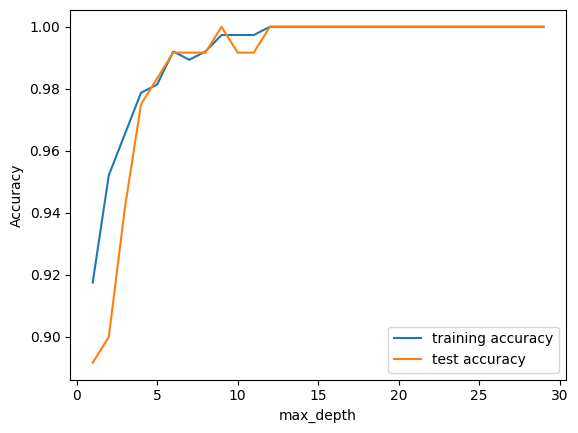

In [28]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = ExtraTreesClassifier(max_depth=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gbc=GradientBoostingClassifier(n_estimators=100,max_depth=6,random_state=42)
gbc.fit(X_train_resampled,y_train_resampled)
y_train_gbc = gbc.predict(X_train_resampled)
y_test_gbc = gbc.predict(X_test)

In [30]:
acc_train_gbc = metrics.accuracy_score(y_train_resampled,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("GRADIENTBOOST : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("GRADIENTBOOST : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train_resampled,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("GRADIENTBOOST  : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("GRADIENTBOOST  : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()




recall_score_train_gbc = metrics.recall_score(y_train_resampled,y_train_gbc)
recall_score_test_gbc = metrics.recall_score(y_test,y_test_gbc)
print("GRADIENTBOOST  : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("GRADIENTBOOST : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train_resampled,y_train_gbc)
precision_score_test_gbc= metrics.precision_score(y_test,y_test_gbc)
print("GRADIENTBOOST : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("GRADIENTBOOST : precision on test Data: {:.3f}".format(precision_score_test_gbc))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_gbc).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

GRADIENTBOOST : Accuracy on training Data: 1.000
GRADIENTBOOST : Accuracy on test Data: 0.942

GRADIENTBOOST  : f1_score on training Data: 1.000
GRADIENTBOOST  : f1_score on test Data: 0.944

GRADIENTBOOST  : Recall on training Data: 1.000
GRADIENTBOOST : Recall on test Data: 0.952

GRADIENTBOOST : precision on training Data: 1.000
GRADIENTBOOST : precision on test Data: 0.937

Specificity :   0.931


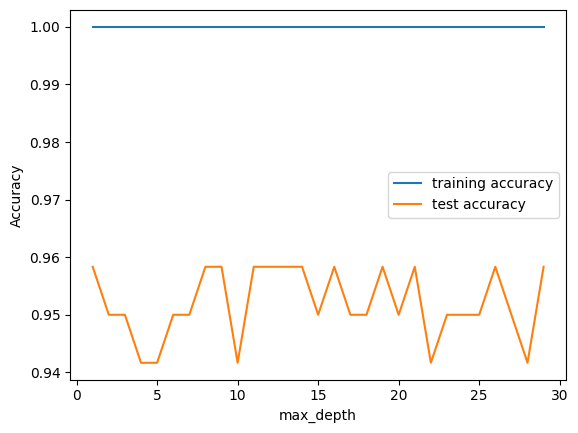

In [31]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = GradientBoostingClassifier(max_depth=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Applying PCA

In [32]:
from sklearn.decomposition import PCA 
from joblib import dump
pca=PCA(n_components=15)
pca.fit(X_train_resampled)
X_train_resampled_pca=pca.fit_transform(X_train_resampled)
X_new=pca.transform(X_train_resampled)
dump(pca,'pca.joblib')
X_new.shape

(376, 15)

In [33]:
print(pca.explained_variance_ratio_)

[9.98770879e-01 7.79299669e-04 3.57658685e-04 4.11079831e-05
 2.64734781e-05 1.44313369e-05 6.33452848e-06 2.04107932e-06
 1.04330647e-06 3.20112948e-07 1.60293072e-07 7.36209239e-08
 5.93059751e-08 2.33026456e-08 1.79863900e-08]


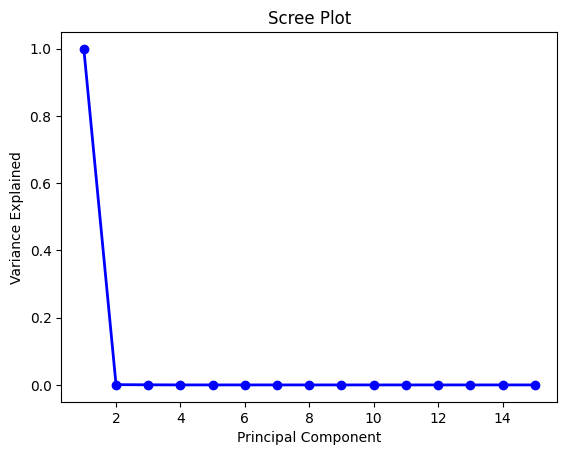

In [34]:
import matplotlib.pyplot as plt
import numpy as np
values=np.arange(pca.n_components_)+1
plt.plot(values,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [35]:
top_15_feature_indices = abs(pca.components_).argsort()[::-1][:15]
top_15_feature_names = X_train.columns[top_15_feature_indices]

print(f"Top 15 features contributing the most to the variance of the principal components:\n{top_15_feature_names}")

Top 15 features contributing the most to the variance of the principal components:
[['wc' 'sg' 'bgr' 'bu' 'bp' 'age' 'pcv' 'sc' 'pot' 'sod' 'hemo' 'rc'
  'cad' 'ba' 'su' 'ane' 'rbc' 'al' 'pcc' 'dm' 'htn' 'pe' 'pc' 'appet']
 ['wc' 'bu' 'sg' 'pcv' 'bgr' 'sc' 'bp' 'sod' 'age' 'ba' 'pot' 'su' 'hemo'
  'al' 'pc' 'rbc' 'cad' 'pcc' 'ane' 'rc' 'appet' 'htn' 'pe' 'dm']
 ['wc' 'sg' 'bgr' 'bp' 'bu' 'age' 'sc' 'ane' 'pot' 'sod' 'ba' 'rbc' 'pcv'
  'pcc' 'pc' 'su' 'pe' 'cad' 'al' 'dm' 'appet' 'hemo' 'htn' 'rc']
 ['wc' 'sg' 'ba' 'bu' 'htn' 'age' 'sod' 'pcv' 'bp' 'bgr' 'rbc' 'sc' 'ane'
  'pcc' 'pe' 'rc' 'hemo' 'pot' 'cad' 'pc' 'appet' 'al' 'dm' 'su']
 ['wc' 'sg' 'pcv' 'bp' 'age' 'bgr' 'bu' 'rc' 'cad' 'sod' 'dm' 'htn' 'ane'
  'pot' 'sc' 'ba' 'pcc' 'appet' 'rbc' 'pe' 'su' 'pc' 'hemo' 'al']
 ['wc' 'sg' 'bgr' 'age' 'bp' 'bu' 'cad' 'pcc' 'ba' 'rbc' 'su' 'sod' 'sc'
  'pe' 'pc' 'pot' 'ane' 'dm' 'appet' 'htn' 'rc' 'al' 'pcv' 'hemo']
 ['sg' 'wc' 'dm' 'pcv' 'ba' 'pcc' 'bgr' 'ane' 'htn' 'rc' 'pe' 'age' 'cad'
  '

C:\Users\sailu\AppData\Local\Temp\ipykernel_26096\3732161413.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  top_15_feature_names = X_train.columns[top_15_feature_indices]


## Decision tree

In [36]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier(max_depth=30)
dt.fit(X_train_resampled_pca,y_train_resampled)
X_test_pca=pca.transform(X_test)

y_train_tree = dt.predict(X_new)
y_test_tree = dt.predict(X_test_pca)

In [37]:
acc_train_treep = metrics.accuracy_score(y_train_resampled,y_train_tree)
acc_test_treep = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_treep))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_treep))
print()

f1_score_train_tree = metrics.f1_score(y_train_resampled,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train_resampled,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train_resampled,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_tree).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.958

Decision Tree : f1_score on training Data: 1.000
Decision Tree : f1_score on test Data: 0.959

Decision Tree : Recall on training Data: 1.000
Decision Tree : Recall on test Data: 0.952

Decision Tree : precision on training Data: 1.000
Decision Tree : precision on test Data: 0.967

Specificity :   0.966


## ACCURACY GRAPH

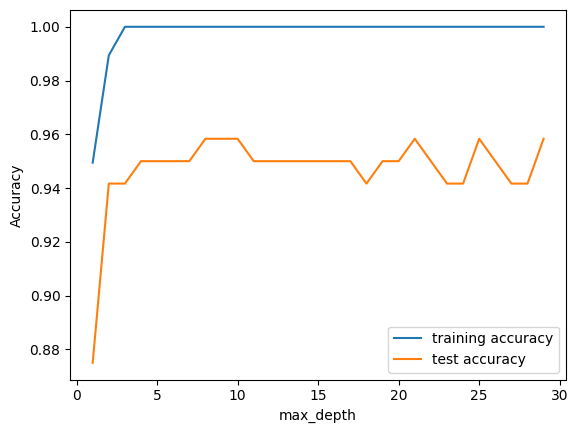

In [38]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## knn

In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn=KNeighborsClassifier()
knn.fit(X_train_resampled_pca,y_train_resampled)
X_test_pca=pca.transform(X_test)
y_train_knn = knn.predict(X_new)
y_test_knn = knn.predict(X_test_pca)

In [40]:
acc_train_knnp = metrics.accuracy_score(y_train_resampled,y_train_knn)
acc_test_knnp = metrics.accuracy_score(y_test,y_test_knn)
print("KNN : Accuracy on training Data: {:.3f}".format(acc_train_knnp))
print("KNN : Accuracy on test Data: {:.3f}".format(acc_test_knnp))
print()

f1_score_train_knn = metrics.f1_score(y_train_resampled,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("KNN : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("KNN : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train_resampled,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("KNN : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("KNN: Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train_resampled,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("KNN : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("KNN : precision on test Data: {:.3f}".format(precision_score_test_knn))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_knn).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

KNN : Accuracy on training Data: 0.838
KNN : Accuracy on test Data: 0.692

KNN : f1_score on training Data: 0.809
KNN : f1_score on test Data: 0.634

KNN : Recall on training Data: 0.686
KNN: Recall on test Data: 0.516

KNN : precision on training Data: 0.985
KNN : precision on test Data: 0.821

Specificity :   0.879


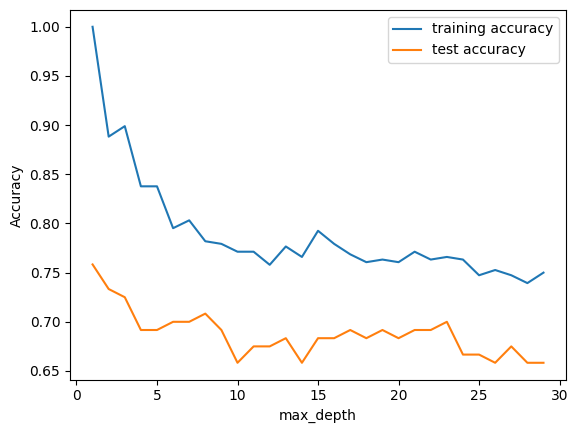

In [41]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = KNeighborsClassifier(n_neighbors=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Cat Boost

In [42]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cat=CatBoostClassifier()
cat.fit(X_train_resampled_pca,y_train_resampled)
X_test_pca=pca.transform(X_test)
y_train_cat = cat.predict(X_new)
y_test_cat = cat.predict(X_test_pca)

Learning rate set to 0.006785
0:	learn: 0.6835735	total: 4.34ms	remaining: 4.33s
1:	learn: 0.6746730	total: 6.4ms	remaining: 3.19s
2:	learn: 0.6682891	total: 8.39ms	remaining: 2.79s
3:	learn: 0.6600237	total: 10.4ms	remaining: 2.59s
4:	learn: 0.6542151	total: 12.3ms	remaining: 2.44s
5:	learn: 0.6450969	total: 16.4ms	remaining: 2.71s
6:	learn: 0.6383173	total: 18.4ms	remaining: 2.62s
7:	learn: 0.6313121	total: 20.4ms	remaining: 2.53s
8:	learn: 0.6233678	total: 22.4ms	remaining: 2.47s
9:	learn: 0.6158604	total: 24.4ms	remaining: 2.42s
10:	learn: 0.6074887	total: 26.3ms	remaining: 2.37s
11:	learn: 0.6006936	total: 28.2ms	remaining: 2.32s
12:	learn: 0.5945921	total: 31.7ms	remaining: 2.4s
13:	learn: 0.5879844	total: 33.7ms	remaining: 2.37s
14:	learn: 0.5825457	total: 35.6ms	remaining: 2.34s
15:	learn: 0.5750402	total: 37.7ms	remaining: 2.31s
16:	learn: 0.5696669	total: 39.6ms	remaining: 2.29s
17:	learn: 0.5624915	total: 41.5ms	remaining: 2.27s
18:	learn: 0.5569857	total: 43.5ms	remaining: 

In [43]:
acc_train_catp = metrics.accuracy_score(y_train_resampled,y_train_cat)
acc_test_catp = metrics.accuracy_score(y_test,y_test_cat)
print("CATBOOST : Accuracy on training Data: {:.3f}".format(acc_train_catp))
print("CATBOOST : Accuracy on test Data: {:.3f}".format(acc_test_catp))
print()

f1_score_train_cat = metrics.f1_score(y_train_resampled,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CATBOOST : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CATBOOST : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train_resampled,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CATBOOST : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CATBOOST: Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train_resampled,y_train_cat)
precision_score_test_cat= metrics.precision_score(y_test,y_test_cat)
print("CATBOOST : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CATBOOST : precision on test Data: {:.3f}".format(precision_score_test_cat))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_cat).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

CATBOOST : Accuracy on training Data: 1.000
CATBOOST : Accuracy on test Data: 0.967

CATBOOST : f1_score on training Data: 1.000
CATBOOST : f1_score on test Data: 0.967

CATBOOST : Recall on training Data: 1.000
CATBOOST: Recall on test Data: 0.952

CATBOOST : precision on training Data: 1.000
CATBOOST : precision on test Data: 0.983

Specificity :   0.983


Learning rate set to 0.5
0:	learn: 0.1697463	total: 2.39ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 1.63ms	remaining: 1.63ms
1:	learn: 0.0670734	total: 4.29ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 2.8ms	remaining: 5.61ms
1:	learn: 0.0670734	total: 6.68ms	remaining: 3.34ms
2:	learn: 0.0363913	total: 8.44ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 2.29ms	remaining: 6.87ms
1:	learn: 0.0670734	total: 3.95ms	remaining: 3.95ms
2:	learn: 0.0363913	total: 5.59ms	remaining: 1.86ms
3:	learn: 0.0270054	total: 7.64ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 2.96ms	remaining: 11.8ms
1:	learn: 0.0670734	total: 4.67ms	remaining: 7ms
2:	learn: 0.0363913	total: 6.11ms	remaining: 4.07ms
3:	learn: 0.0270054	total: 7.75ms	remaining: 1.94ms
4:	learn: 0.0164902	total: 9.46ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1697463	total: 2.02ms	remaining: 10.1ms
1:	learn: 0.0670734	total: 5.37ms	rem

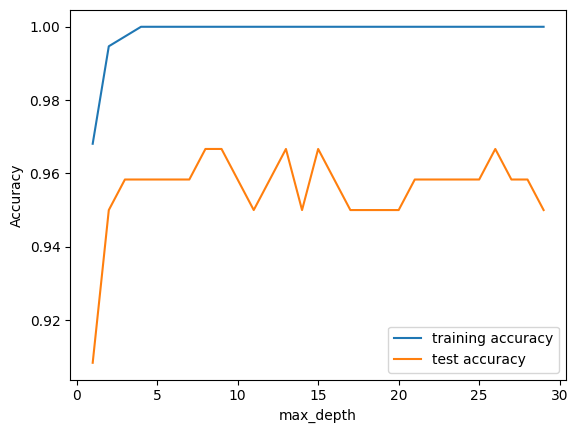

In [44]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = CatBoostClassifier(n_estimators=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Xg Boost

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb=XGBClassifier()
xgb.fit(X_train_resampled_pca,y_train_resampled)
X_test_pca=pca.transform(X_test)
y_train_xgb = xgb.predict(X_new)
y_test_xgb = xgb.predict(X_test_pca)

In [46]:
acc_train_xgbp = metrics.accuracy_score(y_train_resampled,y_train_xgb)
acc_test_xgbp = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBOOST : Accuracy on training Data: {:.3f}".format(acc_train_xgbp))
print("XGBOOST : Accuracy on test Data: {:.3f}".format(acc_test_xgbp))
print()

f1_score_train_xgb = metrics.f1_score(y_train_resampled,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBOOST : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBOOST : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train_resampled,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBOOST : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBOOST: Recall on test Data: {:.3f}".format(recall_score_test_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train_resampled,y_train_xgb)
precision_score_test_xgb= metrics.precision_score(y_test,y_test_xgb)
print("XGBOOST : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBOOST : precision on test Data: {:.3f}".format(precision_score_test_xgb))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_xgb).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

XGBOOST : Accuracy on training Data: 1.000
XGBOOST : Accuracy on test Data: 0.975

XGBOOST : f1_score on training Data: 1.000
XGBOOST : f1_score on test Data: 0.976

XGBOOST : Recall on training Data: 1.000
XGBOOST: Recall on test Data: 0.984

XGBOOST : precision on training Data: 1.000
XGBOOST : precision on test Data: 0.968

Specificity :   0.966


In [47]:
import pickle

# dump information to that file
pickle.dump(xgb, open('model1.pkl', 'wb'))

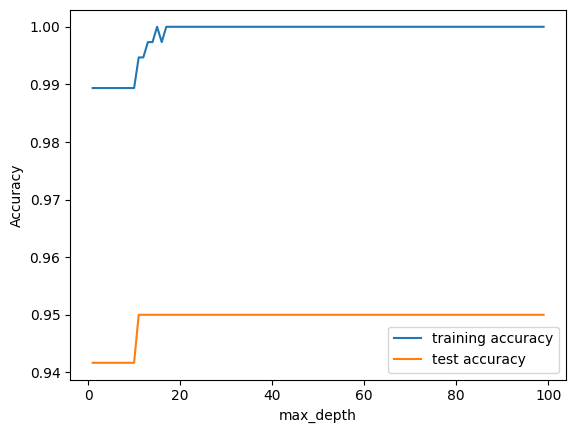

In [48]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,100)
for n in depth:
    tree_test = XGBClassifier(n_estimators=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_xgb))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Extra Tree

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Extra=ExtraTreesClassifier(n_estimators=100,max_depth=6,random_state=42)
Extra.fit(X_train_resampled_pca,y_train_resampled)
X_test_pca=pca.transform(X_test)
y_train_Extra = Extra.predict(X_new)
y_test_Extra = Extra.predict(X_test_pca)

In [50]:
acc_train_Extrap = metrics.accuracy_score(y_train_resampled,y_train_Extra)
acc_test_Extrap = metrics.accuracy_score(y_test,y_test_Extra)
print("EXTRATREE : Accuracy on training Data: {:.3f}".format(acc_train_Extrap))
print("EXTRATREE : Accuracy on test Data: {:.3f}".format(acc_test_Extrap))
print()

f1_score_train_Extra = metrics.f1_score(y_train_resampled,y_train_Extra)
f1_score_test_Extra = metrics.f1_score(y_test,y_test_Extra)
print("EXTRATREE : f1_score on training Data: {:.3f}".format(f1_score_train_Extra))
print("EXTRATREE : f1_score on test Data: {:.3f}".format(f1_score_test_Extra))
print()




recall_score_train_Extra = metrics.recall_score(y_train_resampled,y_train_Extra)
recall_score_test_Extra = metrics.recall_score(y_test,y_test_Extra)
print("EXTRATREE : Recall on training Data: {:.3f}".format(recall_score_train_Extra))
print("EXTRATREE: Recall on test Data: {:.3f}".format(recall_score_test_Extra))
print()

precision_score_train_Extra = metrics.precision_score(y_train_resampled,y_train_Extra)
precision_score_test_Extra= metrics.precision_score(y_test,y_test_Extra)
print("EXTRATREE : precision on training Data: {:.3f}".format(precision_score_train_Extra))
print("EXTRATREE : precision on test Data: {:.3f}".format(precision_score_test_Extra))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_Extra).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

EXTRATREE : Accuracy on training Data: 0.968
EXTRATREE : Accuracy on test Data: 0.950

EXTRATREE : f1_score on training Data: 0.967
EXTRATREE : f1_score on test Data: 0.949

EXTRATREE : Recall on training Data: 0.936
EXTRATREE: Recall on test Data: 0.903

EXTRATREE : precision on training Data: 1.000
EXTRATREE : precision on test Data: 1.000

Specificity :   1.0


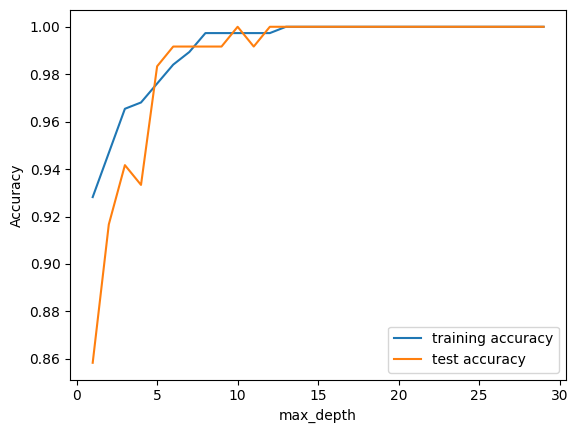

In [51]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = ExtraTreesClassifier(max_depth=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Gradient Boost

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gbc=GradientBoostingClassifier(n_estimators=100,max_depth=6,random_state=42)
gbc.fit(X_train_resampled_pca,y_train_resampled)
X_test_pca=pca.transform(X_test)
y_train_gbc = gbc.predict(X_new)
y_test_gbc = gbc.predict(X_test_pca)

In [53]:
acc_train_gbcp = metrics.accuracy_score(y_train_resampled,y_train_gbc)
acc_test_gbcp = metrics.accuracy_score(y_test,y_test_gbc)
print("GRADIENTBOOST : Accuracy on training Data: {:.3f}".format(acc_train_gbcp))
print("GRADIENTBOOST : Accuracy on test Data: {:.3f}".format(acc_test_gbcp))
print()

f1_score_train_gbc = metrics.f1_score(y_train_resampled,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("GRADIENTBOOST  : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("GRADIENTBOOST  : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()




recall_score_train_gbc = metrics.recall_score(y_train_resampled,y_train_gbc)
recall_score_test_gbc = metrics.recall_score(y_test,y_test_gbc)
print("GRADIENTBOOST  : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("GRADIENTBOOST : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train_resampled,y_train_gbc)
precision_score_test_gbc= metrics.precision_score(y_test,y_test_gbc)
print("GRADIENTBOOST : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("GRADIENTBOOST : precision on test Data: {:.3f}".format(precision_score_test_gbc))
print()

tn,fp,fn,tp =confusion_matrix(y_test,y_test_gbc).ravel()
specificity=tn/(tn+fp)
print("Specificity :  ",round(specificity,3))

GRADIENTBOOST : Accuracy on training Data: 1.000
GRADIENTBOOST : Accuracy on test Data: 0.967

GRADIENTBOOST  : f1_score on training Data: 1.000
GRADIENTBOOST  : f1_score on test Data: 0.967

GRADIENTBOOST  : Recall on training Data: 1.000
GRADIENTBOOST : Recall on test Data: 0.952

GRADIENTBOOST : precision on training Data: 1.000
GRADIENTBOOST : precision on test Data: 0.983

Specificity :   0.983


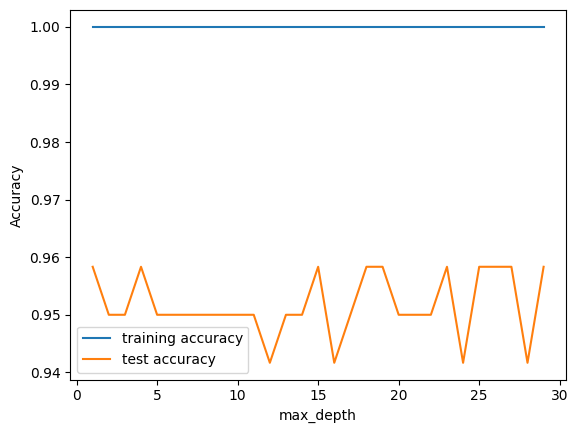

In [54]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = GradientBoostingClassifier(max_depth=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [55]:
def compare_accuracy(models, accuracies_with_pca, accuracies_without_pca):
    from prettytable import PrettyTable

    # Create a PrettyTable object
    table = PrettyTable()

    # Set the alignment of the columns
    table.align["Model"] = "l"
    table.align["Accuracy (With PCA)"] = "r"
    table.align["Accuracy (Without PCA)"] = "r"

    # Add the headers
    table.field_names = ["Model", "Accuracy (With PCA)", "Accuracy (Without PCA)"]

    # Add the data
    for model, accuracy_with_pca, accuracy_without_pca in zip(models, accuracies_with_pca, accuracies_without_pca):
        table.add_row([model, round(accuracy_with_pca, 3), round(accuracy_without_pca, 3)])

    # Print the table
    print(table)

# Example usage:
models = ['DecisionTree', 'KNN', 'CatBoost','XgBoost','Extra Tree','GradientBoost']
accuracies_with_pca = [acc_test_treep,acc_train_knnp,acc_test_catp,acc_test_xgb,acc_test_treep,acc_test_gbcp]
accuracies_without_pca=[acc_test_tree,acc_train_knn,acc_test_cat,acc_test_xgb,acc_test_tree,acc_test_gbc]
compare_accuracy(models, accuracies_with_pca, accuracies_without_pca)


+---------------+---------------------+------------------------+
|     Model     | Accuracy (With PCA) | Accuracy (Without PCA) |
+---------------+---------------------+------------------------+
|  DecisionTree |        0.958        |          0.95          |
|      KNN      |        0.838        |         0.838          |
|    CatBoost   |        0.967        |          0.95          |
|    XgBoost    |         0.95        |          0.95          |
|   Extra Tree  |        0.958        |          0.95          |
| GradientBoost |        0.967        |         0.942          |
+---------------+---------------------+------------------------+
